In [216]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt # plot
plt.rcParams['figure.figsize'] = [16, 10]

import datetime as dt #

import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.cluster import MiniBatchKMeans

## EDA

In [11]:
np.random.seed(1987)
N = 100000 # number of sample rows in plots
t0 = dt.datetime.now()
train = pd.read_csv('./input/nyc-taxi-trip-duration/train.csv')
test = pd.read_csv('./input/nyc-taxi-trip-duration/test.csv')
sample_submission = pd.read_csv('./input/nyc-taxi-trip-duration/sample_submission.csv')

In [19]:
print('We have {} training rows and {} test rows.'.format(train.shape[0], test.shape[0]))
print('We have {} training columns and {} test columns.'.format(train.shape[1], test.shape[1]))
train.head(2)

We have 1458644 training rows and 625134 test rows.
We have 11 training columns and 9 test columns.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [20]:
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [43]:
train_summary = DataFrameSummary(train)
test_summary = DataFrameSummary(test)

In [44]:
display(train_summary.summary())
display(test_summary.summary())

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,NaN,1.45864e+06,NaN,NaN,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,NaN,1.45864e+06
mean,NaN,1.53495,NaN,NaN,1.66453,-73.9735,40.7509,-73.9734,40.7518,NaN,959.492
std,NaN,0.498777,NaN,NaN,1.31424,0.0709019,0.0328812,0.0706433,0.0358906,NaN,5237.43
min,NaN,1,NaN,NaN,0,-121.933,34.3597,-121.933,32.1811,NaN,1
25%,NaN,1,NaN,NaN,1,-73.9919,40.7373,-73.9913,40.7359,NaN,397
50%,NaN,2,NaN,NaN,1,-73.9817,40.7541,-73.9798,40.7545,NaN,662
75%,NaN,2,NaN,NaN,2,-73.9673,40.7684,-73.963,40.7698,NaN,1075
max,NaN,2,NaN,NaN,9,-61.3355,51.8811,-61.3355,43.921,NaN,3.52628e+06
counts,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644
uniques,1458644,2,1380222,1380377,10,23047,45245,33821,62519,2,7417


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
count,NaN,625134,NaN,625134,625134,625134,625134,625134,NaN
mean,NaN,1.53488,NaN,1.66177,-73.9736,40.7509,-73.9735,40.7518,NaN
std,NaN,0.498782,NaN,1.31129,0.073389,0.0298478,0.0725649,0.0358239,NaN
min,NaN,1,NaN,0,-121.933,37.3896,-121.933,36.6013,NaN
25%,NaN,1,NaN,1,-73.9919,40.7374,-73.9913,40.736,NaN
50%,NaN,2,NaN,1,-73.9817,40.7541,-73.9798,40.7545,NaN
75%,NaN,2,NaN,2,-73.9674,40.7684,-73.963,40.7699,NaN
max,NaN,2,NaN,9,-69.2489,42.8149,-67.4968,48.8576,NaN
counts,625134,625134,625134,625134,625134,625134,625134,625134,625134
uniques,625134,2,610581,8,18926,38408,26476,51439,2


In [42]:
print('Id is unique.') if train.id.nunique() == train.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(train.id.values, test.id.values))== 0 else print('oops')
print('We do not need to worry about missing values.') if train.count().min() == train.shape[0] and test.count().min() == test.shape[0] else print('oops')
print('The store_and_fwd_flag is boolean') if train_summary.summary().store_and_fwd_flag.types == 'bool' else print('oops')

Id is unique.
Train and test sets are distinct.
We do not need to worry about missing values.
The store_and_fwd_flag is boolean


In [48]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train.loc[:, 'pickup_date'] = train.pickup_datetime.dt.date

test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
test.loc[:, 'pickup_date'] = test.pickup_datetime.dt.date

train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)


train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')

In [50]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26


In [54]:
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())

In [55]:
duration_difference = train[np.abs(train['check_trip_duration'].values - train['trip_duration'].values) > 1]

In [56]:
duration_difference

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration


In [57]:
print('Trip_duration and datetimes are ok.') if len(duration_difference) == 0 else print('oops')

Trip_duration and datetimes are ok.


In [90]:
print("Max trip duration is {:.1f} hours in train dataset.".format(train.trip_duration.max() / 3600))

Max trip duration is 979.5 hours in train dataset.


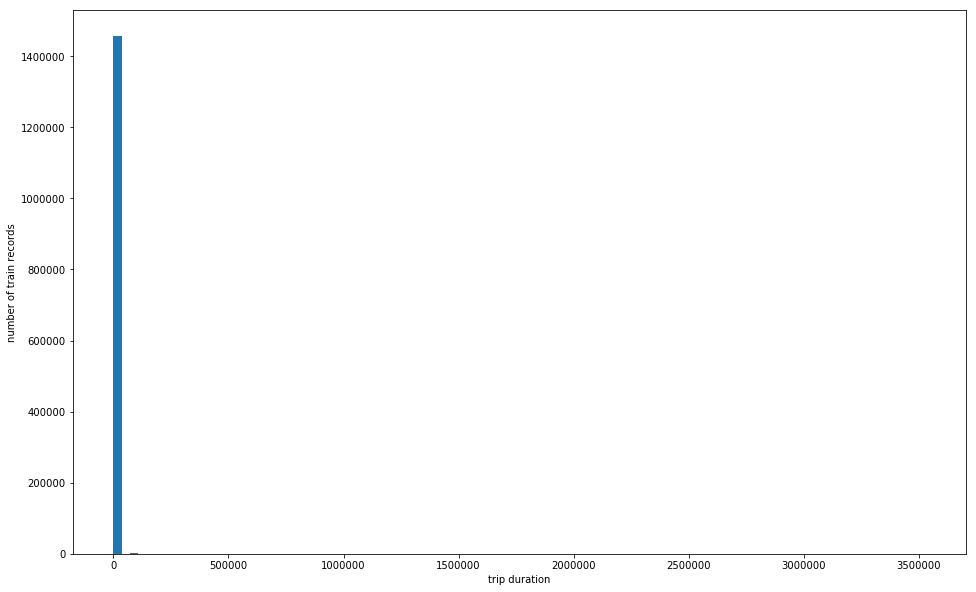

In [112]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel("trip duration")
plt.ylabel("number of train records")
plt.show()

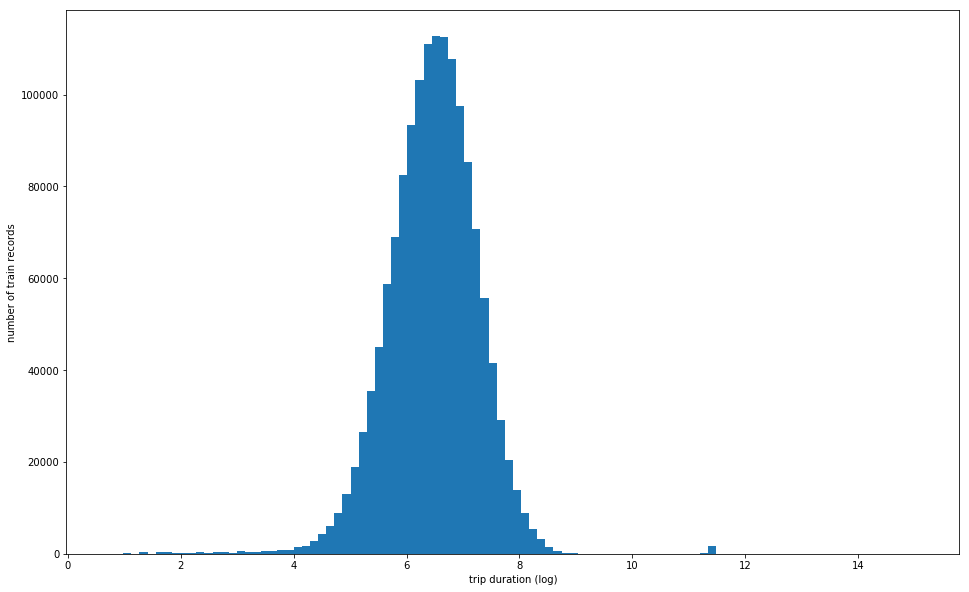

In [111]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel("trip duration (log)")
plt.ylabel("number of train records")
plt.show()

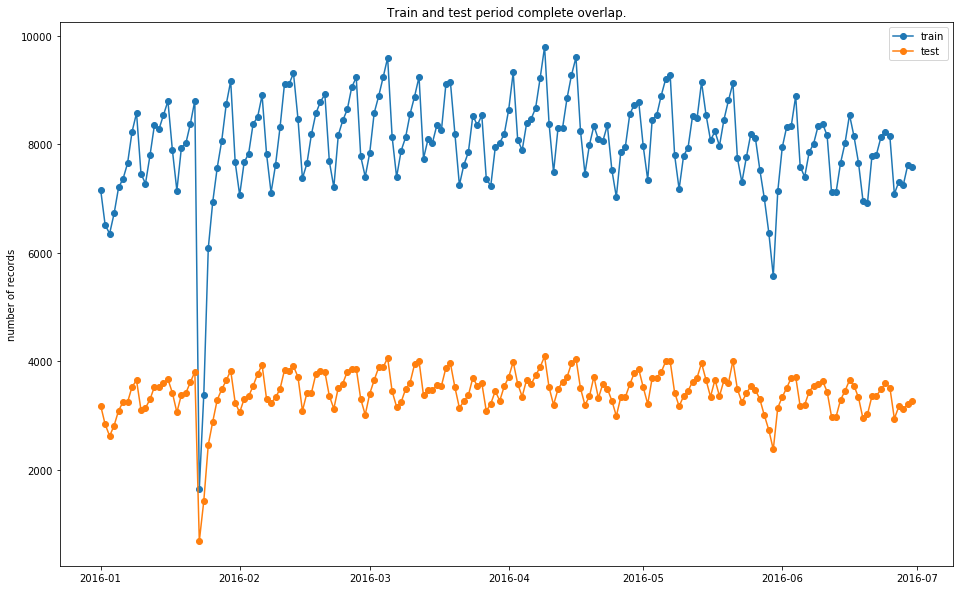

In [116]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Train and test period complete overlap.')
plt.legend()
plt.ylabel('number of records')
plt.show()

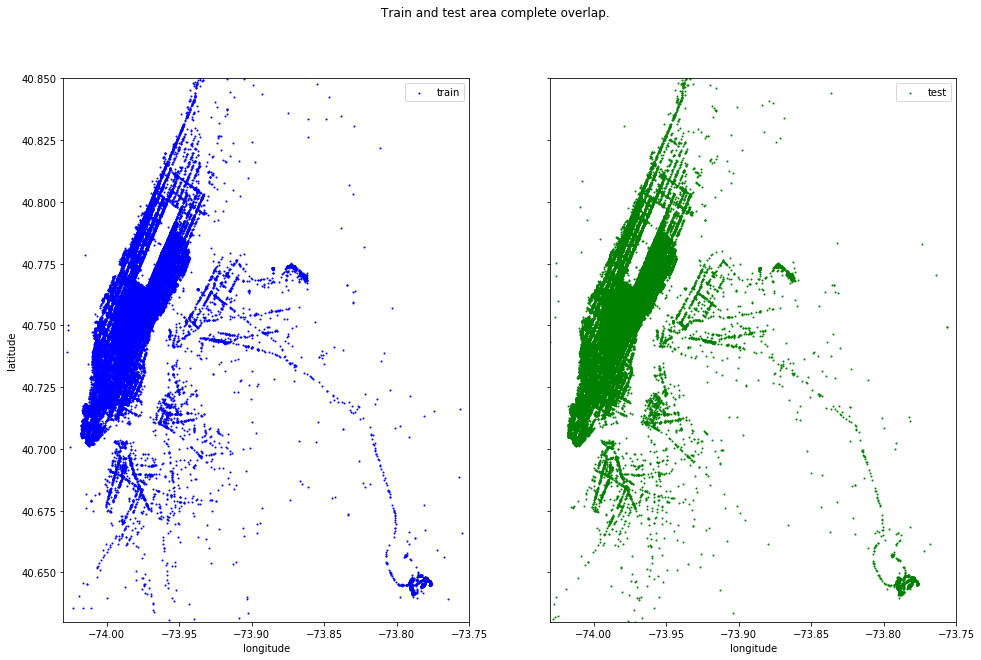

In [131]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

ax[0].scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N], color="blue", s=1, label="train")#, alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:N], test['pickup_latitude'].values[:N], color="green", s=1, label="test")#, alpha=0.1)

fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [132]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0,6.077642


## Feature Extraction

### TODO PCA

In [195]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    test[['pickup_latitude', 'pickup_longitude']].values,
                    test[['dropoff_latitude', 'dropoff_longitude']].values))

pca = PCA().fit(coords)
train['pickup_pca0'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 0]
train['pickup_pca1'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 1]
train['dropoff_pca0'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
train['dropoff_pca1'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
test['pickup_pca0'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 0]
test['pickup_pca1'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 1]
test['dropoff_pca0'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
test['dropoff_pca1'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

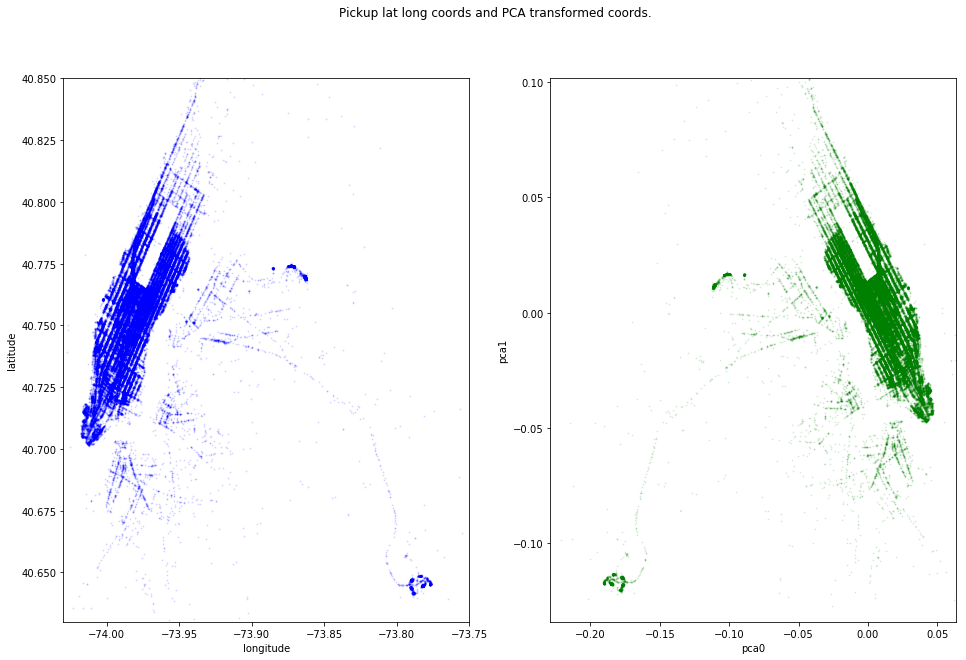

In [196]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N], color='blue', s=1, alpha=0.1)
ax[1].scatter(train['pickup_pca0'].values[:N], train['pickup_pca1'].values[:N], color='green', s=1, alpha=0.1)
fig.suptitle('Pickup lat long coords and PCA transformed coords.')
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
pca_borders = pca.transform([[x, y] for x in city_lat_border for y in city_long_border])
ax[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())
plt.show()

### Distance

In [201]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'pca_manhattan'] = np.abs(train['dropoff_pca1'] - train['pickup_pca1']) + np.abs(train['dropoff_pca0'] - train['pickup_pca0'])

test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)
test.loc[:, 'pca_manhattan'] = np.abs(test['dropoff_pca1'] - test['pickup_pca1']) + np.abs(test['dropoff_pca0'] - test['pickup_pca0'])

train.loc[:, 'center_latitude'] = (train['pickup_latitude'].values + train['dropoff_latitude'].values) / 2
train.loc[:, 'center_longitude'] = (train['pickup_longitude'].values + train['dropoff_longitude'].values) / 2
test.loc[:, 'center_latitude'] = (test['pickup_latitude'].values + test['dropoff_latitude'].values) / 2
test.loc[:, 'center_longitude'] = (test['pickup_longitude'].values + test['dropoff_longitude'].values) / 2


### Datetime features

In [204]:
train.loc[:, 'pickup_weekday'] = train['pickup_datetime'].dt.weekday
train.loc[:, 'pickup_hour_weekofyear'] = train['pickup_datetime'].dt.weekofyear
train.loc[:, 'pickup_hour'] = train['pickup_datetime'].dt.hour
train.loc[:, 'pickup_minute'] = train['pickup_datetime'].dt.minute
train.loc[:, 'pickup_dt'] = (train['pickup_datetime'] - train['pickup_datetime'].min()).dt.total_seconds()
train.loc[:, 'pickup_week_hour'] = train['pickup_weekday'] * 24 + train['pickup_hour']

test.loc[:, 'pickup_weekday'] = test['pickup_datetime'].dt.weekday
test.loc[:, 'pickup_hour_weekofyear'] = test['pickup_datetime'].dt.weekofyear
test.loc[:, 'pickup_hour'] = test['pickup_datetime'].dt.hour
test.loc[:, 'pickup_minute'] = test['pickup_datetime'].dt.minute
test.loc[:, 'pickup_dt'] = (test['pickup_datetime'] - train['pickup_datetime'].min()).dt.total_seconds()
test.loc[:, 'pickup_week_hour'] = test['pickup_weekday'] * 24 + test['pickup_hour']

### Speed

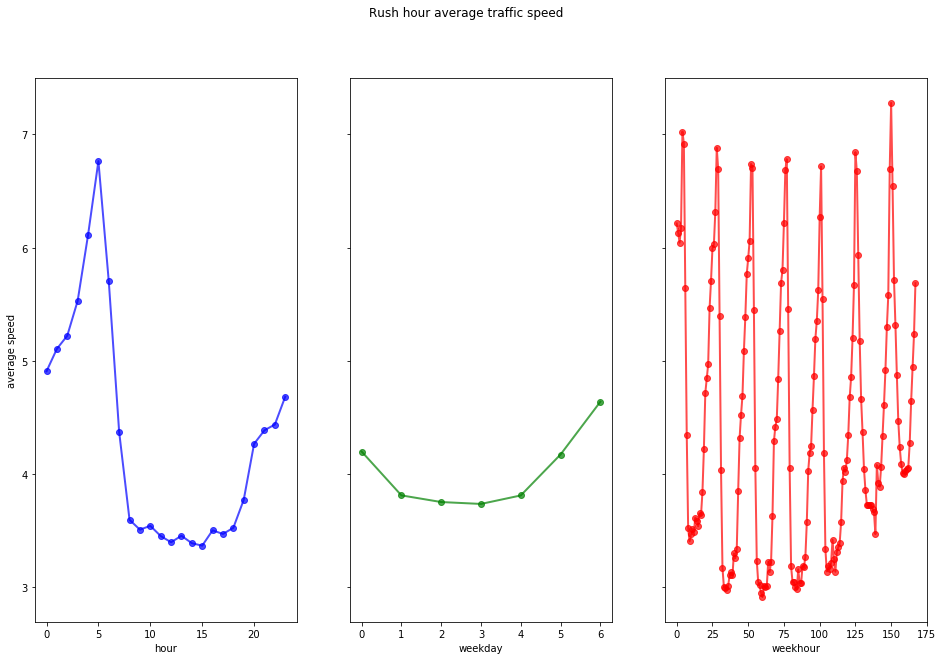

In [211]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('pickup_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('pickup_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()

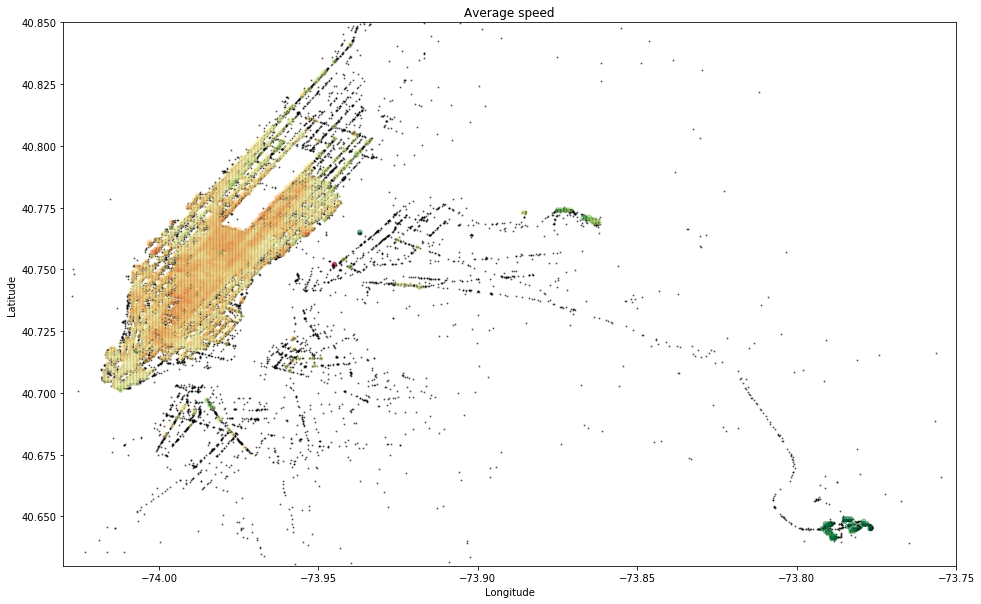

In [213]:
train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 3)
# Average speed for regions
gby_cols = ['pickup_lat_bin', 'pickup_long_bin']
coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = train.groupby(gby_cols).count()[['id']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
coord_stats = coord_stats[coord_stats['id'] > 100]
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N], color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.pickup_long_bin.values, coord_stats.pickup_lat_bin.values, c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 2)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 2)
train.loc[:, 'center_lat_bin'] = np.round(train['center_latitude'], 2)
train.loc[:, 'center_long_bin'] = np.round(train['center_longitude'], 2)
train.loc[:, 'pickup_dt_bin'] = (train['pickup_dt'] // (3 * 3600))
test.loc[:, 'pickup_lat_bin'] = np.round(test['pickup_latitude'], 2)
test.loc[:, 'pickup_long_bin'] = np.round(test['pickup_longitude'], 2)
test.loc[:, 'center_lat_bin'] = np.round(test['center_latitude'], 2)
test.loc[:, 'center_long_bin'] = np.round(test['center_longitude'], 2)
test.loc[:, 'pickup_dt_bin'] = (test['pickup_dt'] // (3 * 3600))

### Clustering

In [217]:
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [218]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])
t1 = dt.datetime.now()
print('Time till clustering: %i seconds' % (t1 - t0).seconds)

Time till clustering: 2069 seconds


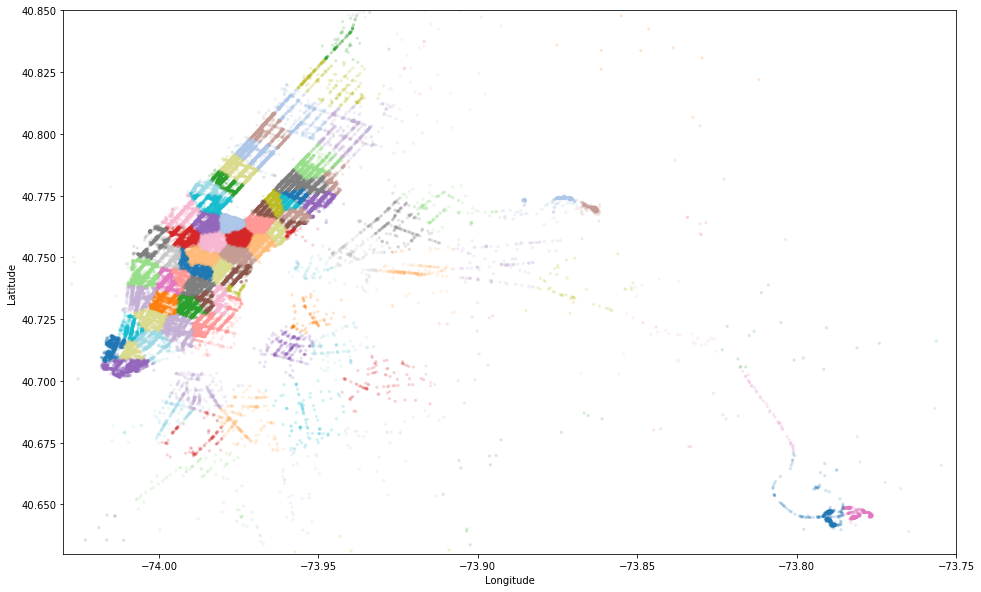

In [219]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N], s=10, lw=0,
           c=train.pickup_cluster[:N].values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

### Temporal and geospatial aggregation

In [225]:
for gby_col in ['pickup_hour', 'pickup_date', 'pickup_dt_bin',
               'pickup_week_hour', 'pickup_cluster', 'dropoff_cluster']:
    gby = train.groupby(gby_col).mean()[['avg_speed_h', 'avg_speed_m', 'log_trip_duration']]
    gby.columns = ['%s_gby_%s' % (col, gby_col) for col in gby.columns]
    train = pd.merge(train, gby, how='left', left_on=gby_col, right_index=True)
    test = pd.merge(test, gby, how='left', left_on=gby_col, right_index=True)

for gby_cols in [['center_lat_bin', 'center_long_bin'],
                 ['pickup_hour', 'center_lat_bin', 'center_long_bin'],
                 ['pickup_hour', 'pickup_cluster'],  ['pickup_hour', 'dropoff_cluster'],
                 ['pickup_cluster', 'dropoff_cluster']]:
    coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
    coord_count = train.groupby(gby_cols).count()[['id']].reset_index()
    coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
    coord_stats = coord_stats[coord_stats['id'] > 100]
    coord_stats.columns = gby_cols + ['avg_speed_h_%s' % '_'.join(gby_cols), 'cnt_%s' %  '_'.join(gby_cols)]
    train = pd.merge(train, coord_stats, how='left', on=gby_cols)
    test = pd.merge(test, coord_stats, how='left', on=gby_cols)

In [226]:
group_freq = '60min'
df_all = pd.concat((train, test))[['id', 'pickup_datetime', 'pickup_cluster', 'dropoff_cluster']]
train.loc[:, 'pickup_datetime_group'] = train['pickup_datetime'].dt.round(group_freq)
test.loc[:, 'pickup_datetime_group'] = test['pickup_datetime'].dt.round(group_freq)

# Count trips over 60min
df_counts = df_all.set_index('pickup_datetime')[['id']].sort_index()
df_counts['count_60min'] = df_counts.isnull().rolling(group_freq).count()['id']
train = train.merge(df_counts, on='id', how='left')
test = test.merge(df_counts, on='id', how='left')

# Count how many trips are going to each cluster over time
dropoff_counts = df_all \
    .set_index('pickup_datetime') \
    .groupby([pd.TimeGrouper(group_freq), 'dropoff_cluster']) \
    .agg({'id': 'count'}) \
    .reset_index().set_index('pickup_datetime') \
    .groupby('dropoff_cluster').rolling('240min').mean() \
    .drop('dropoff_cluster', axis=1) \
    .reset_index().set_index('pickup_datetime').shift(freq='-120min').reset_index() \
    .rename(columns={'pickup_datetime': 'pickup_datetime_group', 'id': 'dropoff_cluster_count'})

train['dropoff_cluster_count'] = train[['pickup_datetime_group', 'dropoff_cluster']].merge(dropoff_counts, on=['pickup_datetime_group', 'dropoff_cluster'], how='left')['dropoff_cluster_count'].fillna(0)
test['dropoff_cluster_count'] = test[['pickup_datetime_group', 'dropoff_cluster']].merge(dropoff_counts, on=['pickup_datetime_group', 'dropoff_cluster'], how='left')['dropoff_cluster_count'].fillna(0)

In [227]:
# Count how many trips are going from each cluster over time
df_all = pd.concat((train, test))[['id', 'pickup_datetime', 'pickup_cluster', 'dropoff_cluster']]
pickup_counts = df_all \
    .set_index('pickup_datetime') \
    .groupby([pd.TimeGrouper(group_freq), 'pickup_cluster']) \
    .agg({'id': 'count'}) \
    .reset_index().set_index('pickup_datetime') \
    .groupby('pickup_cluster').rolling('240min').mean() \
    .drop('pickup_cluster', axis=1) \
    .reset_index().set_index('pickup_datetime').shift(freq='-120min').reset_index() \
    .rename(columns={'pickup_datetime': 'pickup_datetime_group', 'id': 'pickup_cluster_count'})

train['pickup_cluster_count'] = train[['pickup_datetime_group', 'pickup_cluster']].merge(pickup_counts, on=['pickup_datetime_group', 'pickup_cluster'], how='left')['pickup_cluster_count'].fillna(0)
test['pickup_cluster_count'] = test[['pickup_datetime_group', 'pickup_cluster']].merge(pickup_counts, on=['pickup_datetime_group', 'pickup_cluster'], how='left')['pickup_cluster_count'].fillna(0)

### OSRM Features

In [233]:
fr1 = pd.read_csv('./input/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv', usecols=['id', 'total_distance', 'total_travel_time',  'number_of_steps'])
fr2 = pd.read_csv('./input/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv', usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
test_street_info = pd.read_csv('./input/new-york-city-taxi-with-osrm/fastest_routes_test.csv',
                               usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
train_street_info = pd.concat((fr1, fr2))
train = train.merge(train_street_info, how='left', on='id')
test = test.merge(test_street_info, how='left', on='id')
train_street_info.head()

,id,total_distance,total_travel_time,number_of_steps
0,id2875421,2009.1,164.9,5
1,id2377394,2513.2,332.0,6
2,id3504673,1779.4,235.8,4
3,id2181028,1614.9,140.1,5
4,id0801584,1393.5,189.4,5


## TODO Feature check before modeling

## Used Features

In [234]:
%%time
feature_names = list(train.columns)
# print(np.setdiff1d(train.columns, test.columns))
do_not_use_for_training = ['id', 'log_trip_duration', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration',
                           'pickup_date', 'avg_speed_h', 'avg_speed_m', 'pickup_lat_bin', 'pickup_long_bin',
                           'center_lat_bin', 'center_long_bin', 'pickup_dt_bin', 'pickup_datetime_group']
feature_names = [f for f in train.columns if f not in do_not_use_for_training]
display(feature_names)
print('We have %i features.' % len(feature_names))
train[feature_names].count()
y = np.log(train['trip_duration'].values + 1)

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'distance_haversine',
 'distance_dummy_manhattan',
 'direction',
 'pickup_pca0',
 'pickup_pca1',
 'dropoff_pca0',
 'dropoff_pca1',
 'pca_manhattan',
 'center_latitude',
 'center_longitude',
 'pickup_weekday',
 'pickup_hour_weekofyear',
 'pickup_hour',
 'pickup_minute',
 'pickup_dt',
 'pickup_week_hour',
 'pickup_cluster',
 'dropoff_cluster',
 'avg_speed_h_gby_pickup_hour',
 'avg_speed_m_gby_pickup_hour',
 'log_trip_duration_gby_pickup_hour',
 'avg_speed_h_gby_pickup_date',
 'avg_speed_m_gby_pickup_date',
 'log_trip_duration_gby_pickup_date',
 'avg_speed_h_gby_pickup_dt_bin',
 'avg_speed_m_gby_pickup_dt_bin',
 'log_trip_duration_gby_pickup_dt_bin',
 'avg_speed_h_gby_pickup_week_hour',
 'avg_speed_m_gby_pickup_week_hour',
 'log_trip_duration_gby_pickup_week_hour',
 'avg_speed_h_gby_pickup_cluster',
 'avg_speed_m_gby_pickup_cluster',
 'log_trip_dura

We have 59 features.
CPU times: user 1.9 s, sys: 1.2 s, total: 3.1 s
Wall time: 3.8 s


## Modeling

In [235]:
train_x, valid_x, train_y, valid_y = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)

dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)
#dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Try different parameters! My favorite is random search :)
xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10, 'subsample': 0.8,
            'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [186]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 'max_depth': 6, 'subsample': 0.9,
            'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [236]:
model = xgb.train(xgb_pars, dtrain, 60, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.22696	valid-rmse:4.22817
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.407402	valid-rmse:0.422139
[20]	train-rmse:0.371123	valid-rmse:0.3939
[30]	train-rmse:0.363648	valid-rmse:0.390887
[40]	train-rmse:0.357551	valid-rmse:0.38886
[50]	train-rmse:0.353234	valid-rmse:0.38799


In [230]:
model = xgb.train(xgb_pars, dtrain, 60, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.22697	valid-rmse:4.22813
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.413621	valid-rmse:0.426495
[20]	train-rmse:0.381937	valid-rmse:0.400484
[30]	train-rmse:0.372563	valid-rmse:0.395457
[40]	train-rmse:0.365285	valid-rmse:0.392589
[50]	train-rmse:0.361603	valid-rmse:0.392173


In [222]:
model = xgb.train(xgb_pars, dtrain, 60, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.23914	valid-rmse:4.24012
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.43471	valid-rmse:0.445817
[20]	train-rmse:0.389429	valid-rmse:0.406287
[30]	train-rmse:0.378761	valid-rmse:0.399763
[40]	train-rmse:0.372492	valid-rmse:0.396758
[50]	train-rmse:0.368933	valid-rmse:0.395462


In [208]:
model = xgb.train(xgb_pars, dtrain, 60, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.24057	valid-rmse:4.24172
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.441011	valid-rmse:0.451783
[20]	train-rmse:0.391458	valid-rmse:0.407851
[30]	train-rmse:0.38125	valid-rmse:0.401996
[40]	train-rmse:0.375008	valid-rmse:0.398764
[50]	train-rmse:0.371378	valid-rmse:0.397437


In [200]:
model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.22905	valid-rmse:4.23013
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.470647	valid-rmse:0.47959
[20]	train-rmse:0.438049	valid-rmse:0.452071
[30]	train-rmse:0.432459	valid-rmse:0.448479
[40]	train-rmse:0.430092	valid-rmse:0.447724
[50]	train-rmse:0.428833	valid-rmse:0.44766
[60]	train-rmse:0.427601	valid-rmse:0.447313
[70]	train-rmse:0.426583	valid-rmse:0.447266
[80]	train-rmse:0.425418	valid-rmse:0.447415
[90]	train-rmse:0.424577	valid-rmse:0.447465
[100]	train-rmse:0.423995	valid-rmse:0.447471
[110]	train-rmse:0.423501	valid-rmse:0.44747
[120]	train-rmse:0.422825	valid-rmse:0.447527
Stopping. Best iteration:
[73]	train-rmse:0.426036	valid-rmse:0.447163



In [187]:
model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:3.06493	valid-rmse:3.0663
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.532257	valid-rmse:0.537314
[20]	train-rmse:0.511177	valid-rmse:0.517522
[30]	train-rmse:0.497627	valid-rmse:0.504857
[40]	train-rmse:0.489937	valid-rmse:0.498003
[50]	train-rmse:0.48511	valid-rmse:0.493936
[60]	train-rmse:0.481015	valid-rmse:0.490699
[70]	train-rmse:0.477331	valid-rmse:0.487879
[80]	train-rmse:0.475426	valid-rmse:0.486803
[90]	train-rmse:0.473975	valid-rmse:0.485911
[100]	train-rmse:0.472177	valid-rmse:0.484816
[110]	train-rmse:0.470669	valid-rmse:0.483882
[120]	train-rmse:0.468685	valid-rmse:0.482552
[130]	train-rmse:0.467327	valid-rmse:0.481907
[140]	train-rmse:0.466166	valid-rmse:0.481218
[150]	train-rmse:0.46491	valid-rmse:0.480626
[160]	train-rmse:0.463757	valid-rmse:0.480078
[170]	train-rmse:0.462867	valid-rmse:0.479755
[180]	train-rmse:0.462293	valid-rmse:0.4796

In [237]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.38743


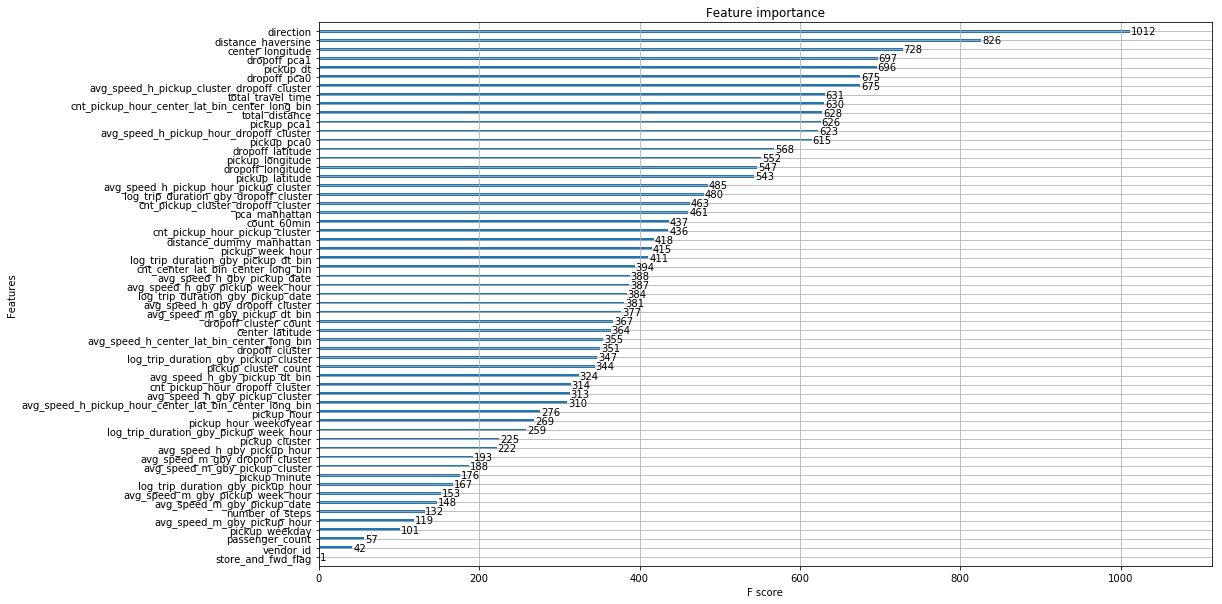

In [238]:
model.feature_names = feature_names
xgb.plot_importance(model, height=0.3)
plt.show()

In [185]:
model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

[0]	train-rmse:4.24293	valid-rmse:4.24413
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.656074	valid-rmse:0.662023
[20]	train-rmse:0.614397	valid-rmse:0.622513
[30]	train-rmse:0.589528	valid-rmse:0.599067
[40]	train-rmse:0.566095	valid-rmse:0.576791
[50]	train-rmse:0.540244	valid-rmse:0.553141
[60]	train-rmse:0.529457	valid-rmse:0.543175
[70]	train-rmse:0.527252	valid-rmse:0.5419
[80]	train-rmse:0.522686	valid-rmse:0.537826
[90]	train-rmse:0.521885	valid-rmse:0.537262
[100]	train-rmse:0.520761	valid-rmse:0.536416
[110]	train-rmse:0.515875	valid-rmse:0.532265
[120]	train-rmse:0.512453	valid-rmse:0.529262
[130]	train-rmse:0.511278	valid-rmse:0.528342
[140]	train-rmse:0.507965	valid-rmse:0.525706
[150]	train-rmse:0.507833	valid-rmse:0.525703
[160]	train-rmse:0.50773	valid-rmse:0.52572
[170]	train-rmse:0.504193	valid-rmse:0.522994
[180]	train-rmse:0.504108	valid-rmse:0.52298

In [184]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.51667


In [175]:
# feature_names
model.feature_names = feature_names

## Feature Importance

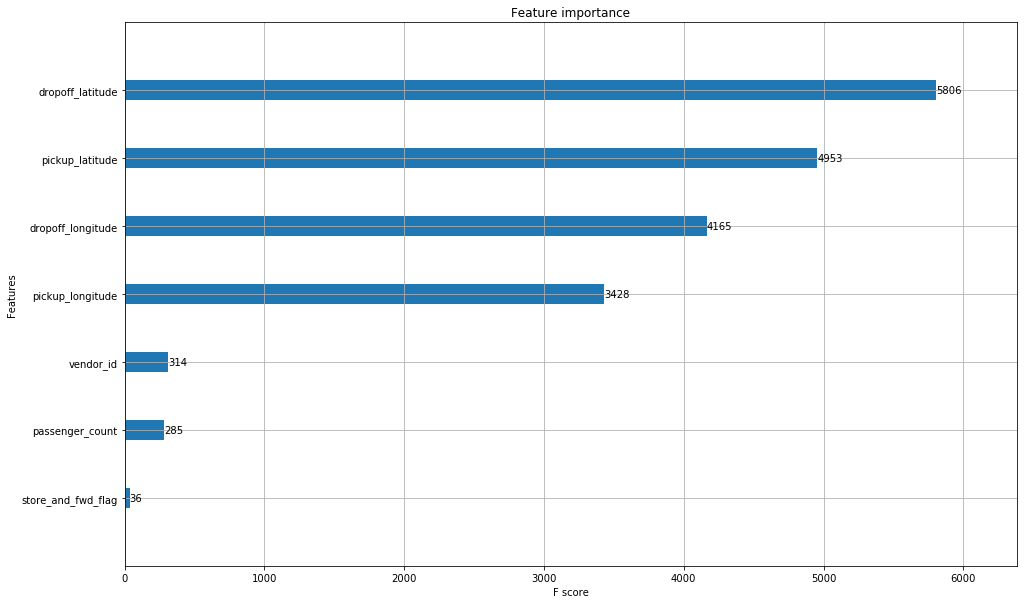

In [178]:
xgb.plot_importance(model, height=0.3)
plt.show()